# GRIP - THE SPARK FOUNDATION
## DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP

### Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
## Task-4: Exploratory Data Analysis - Terrorism
# Author- Arvind Jaiswal
## BATCH: April 2021
## Data Science and Business Analytics Intern at The Sparks Foundation
## Dataset - available Dataset: https://bit.ly/2TK5Xn5
## Language used - Python 3
## IDE used - Anaconda Jupyter Notebook
## Import the required Libraries

In [18]:
# IMPORT THE PACKAGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Reading The Data from data source

In [21]:
# LOAD THE DATASET
data = pd.read_csv("C:/Users/Jais/Documents/FireShot/file/globalterrorism.csv",encoding='latin1',dtype='unicode')



## data Imported sucessfully

In [22]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [23]:
# TOTAL NUMBER OF COUNTRIES IN THIS DATASET

len(data['country_txt'].unique())

205

In [24]:
# TOP 5 COUNTRIES WITH HIGHEST TERRORIST ATTACKS IN THIS DATASET

a,b=np.unique(data['country_txt'],return_counts=True)
samp=pd.DataFrame({'Country' : a, 'Terror_Counts' : b})
samp = samp[samp['Country'] != 'Andorra']
samp=samp.sort_values(by=['Terror_Counts'],ascending=False)
samp = samp.reset_index(drop=True)
samp=samp.head()
samp

,Country,Terror_Counts
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


Text(0.5, 1.0, 'No. of terrorist attacks')

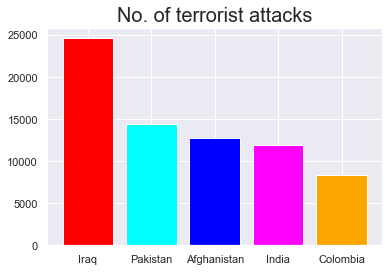

In [25]:
plt.bar(data='samp',height=samp['Terror_Counts'],x=samp['Country'],color=['red', 'cyan', 'blue', 'magenta', 'orange'])
plt.title('No. of terrorist attacks',fontsize='20')

## Analysing terror attacks by year

In [26]:
df1 = data.copy()
df1['Count'] = 1
df1=df1.groupby(['iyear']).count()
df1.drop(df1.columns.difference(['Count']),1,inplace=True)
df1.head()

,Count
iyear,
1970,651
1971,471
1972,568
1973,473
1974,581


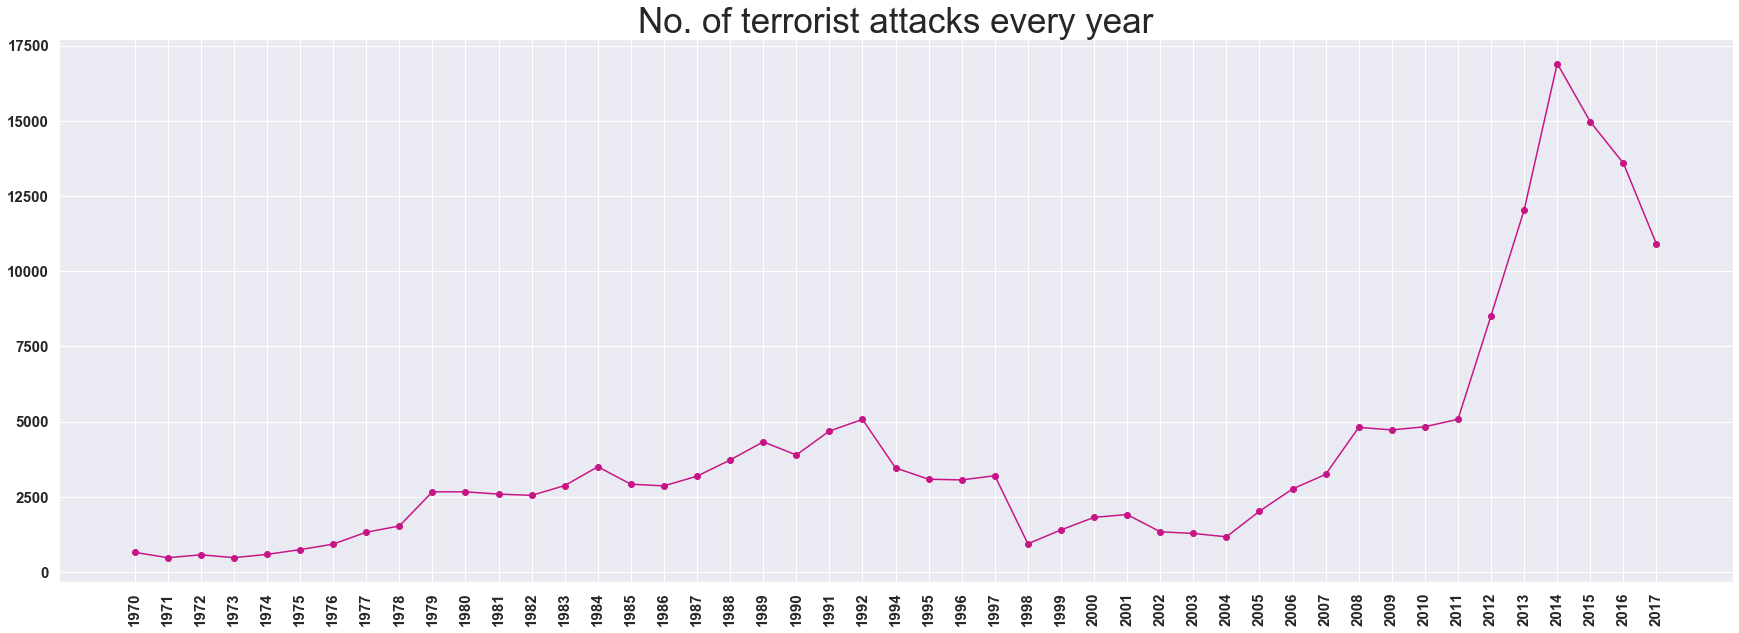

In [27]:
plt.figure(figsize=(30,10))
plt.plot('Count',data=df1,marker='o',color='mediumvioletred')
plt.xticks(weight = 'bold',rotation='vertical',fontsize=15)
plt.yticks(weight = 'bold',fontsize=15)
plt.title('No. of terrorist attacks every year',fontsize='35')
plt.show()

### According to this dataset, the year 2014 had the highest number of terrorist attacks.

In [28]:
# PLOTTING CHLOROPETH MAP AND VISUALIZING THE COUNT OF TERRORISM RECORDED IN EACH COUNTRY

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot

ModuleNotFoundError: No module named 'plotly'

In [ ]:
c,d=np.unique(data['country_txt'],return_counts=True)
df2=pd.DataFrame({'Country' : c, 'Terror_Counts' : d})
df2=df2.sort_values(by=['Terror_Counts'],ascending=False)
df2 = df2.reset_index(drop=True)
df2

In [ ]:
dat = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = df2['Country'],
        locationmode = "country names",
        z = df2['Terror_Counts'],
        text = df2['Country'],
        colorbar = {'title' : 'Scale'},
      )

layout = dict(title = 'Terrorist Attacks by Area',
              geo = dict(projection = {'type':'mercator'})
             )
choromap = go.Figure(data = [dat],layout = layout)
iplot(choromap,validate=False)

### In the above plot, it can be seen that the lighter shades are used to depict regions with high Terrorism. NOTE: The areas shaded with grey are not included in the dataset.

In [ ]:
# PLOTTING DENSITY MAP SHOWING REGIONS OF HIGH TERRORISM
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [ ]:
df5 = data.copy()
df5 = df5.drop_duplicates(subset=['country_txt'])
df5=df5.sort_values('country_txt')
df5=df5.reset_index(drop=True)
z=df5.latitude
x=df5.longitude
i,j=np.unique(data['country_txt'],return_counts=True)
samp4=pd.DataFrame({'Country' : i, 'Terror_Counts' : j})
samp4['latitude'] = z
samp4['longitude'] = x
samp4

In [ ]:
fig = px.density_mapbox(samp4, lat='latitude', lon='longitude',z='Terror_Counts' ,radius=20,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
#fig.update_traces(z=df3['Count'], selector=dict(type='densitymapbox'),visible=True)
fig.show()

### This density map shows that Asia is the continent with highest cases of terrorism recorded

In [ ]:
# MOST INFAMOUS TERROR GANGS

df4 = data.copy()
df4 = df4[df4.gname != 'Unknown']
df4['Count'] = 1
df4=df4.groupby(['gname'])['Count'].sum()
df4 = pd.DataFrame(df4)
df4=df4.sort_values(by=['Count'],ascending=False)
df4=df4.head()

In [ ]:
ax=df4.plot(kind='barh',colormap='PiYG',width=0.5)
plt.ylabel('')
plt.title('Top 5 terrorist organisations',fontsize=20)
plt.show()

### Finding security issues regarding weapons

In [29]:
df6 = data.copy()
df6.drop(df6.columns.difference(['weapsubtype1_txt']), 1, inplace=True)
df6=df6.dropna().reset_index(drop=True)
m,n=np.unique(df6['weapsubtype1_txt'],return_counts=True)
df7=pd.DataFrame({'Weapon_Subtype' : m, 'Counts' : n})
df7

,Weapon_Subtype,Counts
0,Arson/Fire,4141
1,Automatic or Semi-Automatic Rifle,17412
2,Blunt Object,587
3,Dynamite/TNT,1222
4,Explosive,65
5,Gasoline or Alcohol,844
6,Grenade,5167
7,Handgun,6704
8,"Hands, Feet, Fists",231
9,Knife or Other Sharp Object,2585


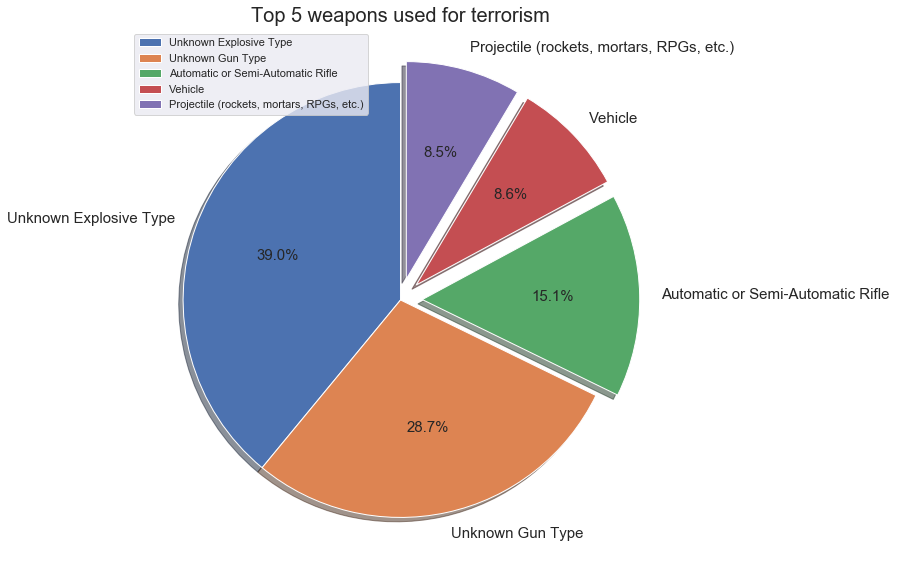

In [30]:
df8 = df7.copy()
df8 = df8.sort_values(by=['Counts'],ascending=False)
df8 = df8.head()
explode = (0,0,0.1,0.1,0.1)
ax=df8.plot(kind='pie',shadow=True,y='Counts',startangle=90,figsize=(15,10),autopct='%1.1f%%',fontsize=15,labels=df8.Weapon_Subtype, labeldistance=1.1,explode=explode)
ax.set_ylabel('')
plt.title('Top 5 weapons used for terrorism',fontsize=20)
plt.show()

In [31]:
# GETTING THE PERCENTAGE OF TERRORISM CAUSED BY ILLEGAL WEAPONS

p=[]
q=['Blunt Object','Gasoline or Alcohol','Hands, Feet, Fists','Knife or Other Sharp Object','Molotov Cocktail/Petrol Bomb','Rope or Other Strangling Device','Suffocation','Suicide (carried bodily by human being)']
for i in q:
    o=df7[df7['Weapon_Subtype']== i].index.values[0]
    p.append(o)
t=[]
for i in range(0,8):
    s=df7._get_value(p[i],'Counts')
    t.append(s)
t = sum(t)
total = df7['Counts'].sum()
Percentage = (t/total) * 100
Percentage = 100 - Percentage
Percentage

94.50420387390243

### Through analysis it can seen that 94.50% of weapons used for terrorism are obtained through illegal means. The other 5.5% of the weapons used is available to the general public like Knives,Petrol,etc.

## This is a security issue as the governments should track down the source of the large number illegal weapons in their country.

## HOT ZONES OF TERRORISM
### Through exploratory analysis it can be verified that Asia is the continent with highest terrorism
### Iraq and Pakistan are the top 2 countries with highest terrorism.
### SECURITY ISSUES AND INSIGHTS GAINED

### 2014 was the year with highest recorded terrorism cases
### The government of each country should track down the source of illegal weapons as they are the largest contributors to terrorism